In [146]:
import numpy as np
from numpy import genfromtxt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as pyplot

In [147]:
#gets data from the two csv files
training = genfromtxt("training.csv", delimiter = ",")
test = genfromtxt("test.csv", delimiter = ",")

In [148]:
#initializes training and test data
X_train = training[:, :-1] 
Y_train = training[:, 3]
X_test = test[:, :-1]
Y_test = test[:, 3]

In [149]:
Cval = [0.0001, 0.001, 0.01, 0.1, 1]
d = [1, 2, 3, 5]
train = []
test = []

for c in Cval:
    for deg in d:
        svc = svm.SVC(C = c, degree = deg)
        svc.fit(X_train, Y_train)
        train += [svc.score(X_train, Y_train)]
        test += [svc.score(X_test, Y_test)]

In [150]:
train

[0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.91100000000000003,
 0.97899999999999998,
 0.97899999999999998,
 0.97899999999999998,
 0.97899999999999998]

In [151]:
import math

def extend(l, num):
    temp = []
    for item in l:
        temp = temp + [(math.log(item, 10))] * num
    return temp

modC = extend(C, 4)
modD = d * 5


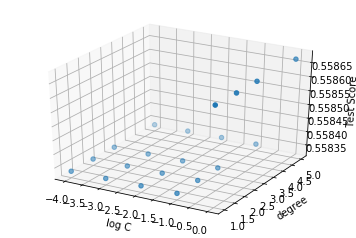

In [152]:
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(modC, modD, test, zdir = 'z') 
pyplot.xlabel("log C")
pyplot.ylabel("degree")
ax.set_zlabel("Test Score")
pyplot.show()
#I'm sorry if this isn't what you want, I'm still not too sure how to deal with GridSearchCV other than the basics

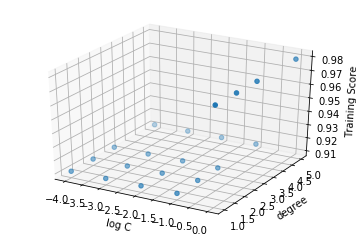

In [153]:
fig = pyplot.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.scatter(modC, modD, train, zdir = 'z')
pyplot.xlabel("log C")
pyplot.ylabel("degree")
ax2.set_zlabel("Training Score")
pyplot.show()

On what basis would you decide that a hyperparameter setting is optimal? Which setting of
(C, d) gave the optimal results?

If selecting from a given set of hyperparameters (like in this case), the obvious choice would be to take the settings that give the highest test score (which was just C = 1) giving a test accuracy of approximately 95.2%. The degree parameter did not actually cause any changes in the data. 

For overfitting and underfitting, it seems that for C < 1, the model was doing fine, and for C = 1, it was overfitting a little, since the training score was higher than the test score (although these numbers feel weird, please comment if you notice something wrong).

In [154]:
data = np.array_split(training, 7)
y = []
x = []

for l in data:
    x += [l[:,:3]]
    y += [l[:,3]]


In [155]:
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

def fit(X, y, gam): #runs the k-fold validation on a given value of gamma
    svc = svm.SVC(gamma = gam)
    score = 0
    for i in range(7):
        tempX, tempY = assemble(X, y, i)
        svc.fit(tempX, tempY)
        score += svc.score(X[i], y[i])
    return score/7

def assemble(X, y, index): #does the k-fold assembling properly, puts together everything other than index
    if index == 0:
        tempX = X[1]
        tempY = y[1]
        for i in range(2, 7):
            tempX = np.concatenate((tempX, X[i]))
            tempY = np.concatenate((tempY, y[i]))
        return tempX, tempY
    tempX = X[0]
    tempY = y[0]
    for j in range(1, 7):
        if j != index:
            tempX = np.concatenate((tempX, X[j]))
            tempY = np.concatenate((tempY, y[j]))
    return tempX, tempY

In [156]:
valid = [fit(x, y, gamma[i]) for i in range(7)] #creates the list of running k-fold on the possible values of gamma
valid

[0.91096931237776313,
 0.95401077795443989,
 0.9630017869454488,
 0.95300474173713601,
 0.91397335059306895,
 0.91096931237776313,
 0.91096931237776313]

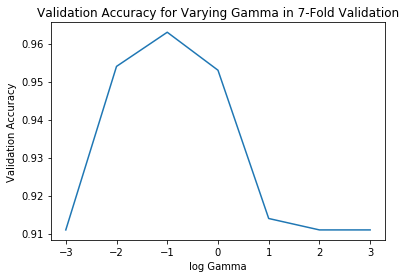

In [157]:
logGamma = [-3, -2, -1, 0, 1, 2, 3]
pyplot.plot(logGamma, valid)
pyplot.xlabel("log Gamma")
pyplot.ylabel("Validation Accuracy")
pyplot.title("Validation Accuracy for Varying Gamma in 7-Fold Validation")
pyplot.show()